In [5]:
import numpy as np
from matplotlib import pyplot as plt
import qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Chapitre 2: Vecteurs, qubit et superposition

L'informatique quantique repose sur l'algèbre linéaire, qui est un domaine des mathématiques reposant sur les vecteurs et les matrices, qui permettent d'effectuer des opérations sur des vecteurs. La mécanique quantique prescrit que les états qu'un système peut occuper sont décrits par des *vecteurs* et les opérations que l'on peut effectuer sur ces états-vecteurs se font au travers de multiplications par des *matrices*. Il est donc logique que nous introduisions ces notions dès à présent.

## 2.1: Vecteurs et produit scalaire

### 2.1.1: Vecteurs

Un vecteur est (en gros) une liste de nombres à qui on impose des propriétés particulières. En général, un vecteur représente les coordonnées d'un point dans un repère par rapport à l'origine. Sur l'image ci-dessous, nous représentons le vecteur $\vec{r} = (a,b)$.

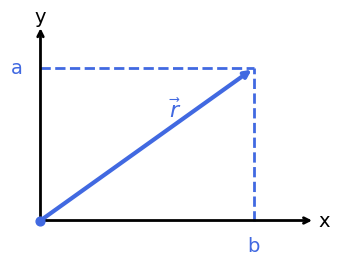

In [6]:

# Coordinates
a, b = 2.5, 3.5

fig, ax = plt.subplots(figsize=(3.5, 3))

# Axes arrows
ax.annotate("", xy=(4.5, 0), xytext=(0, 0),
            arrowprops=dict(arrowstyle="->", linewidth=2, color="black"))
ax.annotate("", xy=(0, 3.2), xytext=(0, 0),
            arrowprops=dict(arrowstyle="->", linewidth=2, color="black"))

# Vector r
ax.annotate("", xy=(b, a), xytext=(0, 0),
            arrowprops=dict(arrowstyle="->", color="royalblue", linewidth=3))
ax.scatter(0, 0, color="royalblue", s=40, zorder=5)

# Dotted projection lines
ax.plot([b, b], [0, a], "--", color="royalblue", linewidth=2)
ax.plot([0, b], [a, a], "--", color="royalblue", linewidth=2)

# Labels
ax.text(4.55, -0.1,r"$\text{x}$", fontsize=14)
ax.text(-0.1, 3.25,r"$\text{y}$", fontsize=14)
ax.text(b, -0.5,r"$\text{b}$", color="royalblue", fontsize=14, ha="center")
ax.text(-0.5, a,r"$\text{a}$", color="royalblue", fontsize=14, va="center")

# Vector label (slightly above arrow tip)
ax.text(b * 0.6, a * 0.6 + 0.2, r"$\vec{r}$", color="royalblue", fontsize=16)

# Clean look
ax.set_xlim(-0.3, 4.6)
ax.set_ylim(-0.3, 3.2)
ax.set_aspect("equal")
ax.axis("off")

plt.tight_layout()
plt.show()


*i)* **Addition de vecteurs**:

$\vec r + \vec p = \begin{pmatrix} a \\ b \end{pmatrix} + \begin{pmatrix} c \\ d \end{pmatrix} = \begin{pmatrix} a+c \\ b+d \end{pmatrix}$

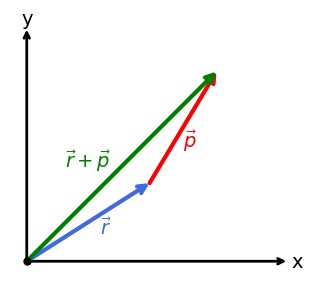

In [7]:

import matplotlib.pyplot as plt
import numpy as np

# --- Define vectors ---
r = np.array([2.2, 1.4])   # \vec{r} (blue)
p = np.array([1.2, 2.0])   # \vec{p} (red)
rp = r + p                 # \vec{r} + \vec{p} (green)

fig, ax = plt.subplots(figsize=(3.5,3))

# --- Helper to draw arrows ---
def draw_vec(start, vec, color, lw=3):
    ax.annotate(
        "", xy=start + vec, xytext=start,
        arrowprops=dict(arrowstyle="->", color=color,
                        lw=lw, mutation_scale=14, shrinkA=0, shrinkB=0)
    )

# --- Axes ---
ax.annotate("", xy=(4.7, 0), xytext=(0, 0),
            arrowprops=dict(arrowstyle="->", lw=2, color="black"))
ax.annotate("", xy=(0, 4.2), xytext=(0, 0),
            arrowprops=dict(arrowstyle="->", lw=2, color="black"))
ax.text(4.75, -0.1, "x", fontsize=14)
ax.text(-0.1, 4.25, "y", fontsize=14)

# --- Draw vectors ---
origin = np.array([0.0, 0.0])
draw_vec(origin, r,   "royalblue")
draw_vec(r,      p,   "red")
draw_vec(origin, rp,  "green")

# --- Labels ---
ax.text(r[0]*0.6, r[1]*0.45 - 0.15, r"$\vec{r}$", color="royalblue", fontsize=14)
ax.text(r[0] + p[0]*0.5, r[1] + p[1]*0.4 - 0.15, r"$\vec{p}$", color="red", fontsize=14)
ax.text(rp[0]*0.2, rp[1]*0.45 + 0.15, r"$\vec{r}+\vec{p}$", color="green", fontsize=14)

# --- Origin dot and style ---
ax.scatter(0, 0, color="black", s=25, zorder=5)
ax.set_xlim(-0.3, 4.8)
ax.set_ylim(-0.3, 4.4)
ax.set_aspect("equal")
ax.axis("off")

plt.tight_layout()
plt.show()


**On s'aperçoit que le résultat de l'addition de deux vecteurs est aussi un vecteur!**

$~$

*ii)* **Multiplication par un nombre**:

$\lambda \begin{pmatrix} a \\ b \end{pmatrix} = \begin{pmatrix} \lambda a \\ \lambda b \end{pmatrix}$

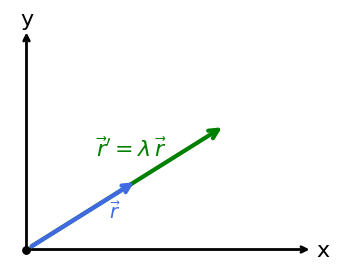

In [8]:

# --- Vector and scalar ---
r = np.array([2.0, 1.25])   # base vector \vec r (blue)
lam = 1.8                    # scale factor λ
rp = lam * r                 # \vec r' = λ \vec r

fig, ax = plt.subplots(figsize=(3.5, 3))

# Axes with arrows
ax.annotate("", xy=(5.2, 0), xytext=(0, 0),
            arrowprops=dict(arrowstyle="->", lw=2, color="black"))
ax.annotate("", xy=(0, 4.0), xytext=(0, 0),
            arrowprops=dict(arrowstyle="->", lw=2, color="black"))
ax.text(5.28, -0.12, "x", fontsize=16)
ax.text(-0.12, 4.08, "y", fontsize=16)

# Origin dot
ax.scatter(0, 0, s=28, color="black", zorder=5)

# Slight offset so the arrow doesn't cover the origin dot
eps = 0.06

# λ \vec r = \vec r' (green)
ax.annotate("", xy=rp, xytext=eps * rp / np.hypot(*rp),
            arrowprops=dict(arrowstyle="->", color="green", lw=3, mutation_scale=16))
ax.text(rp[0]*0.35, rp[1]*0.62+0.3, r"$\vec{r}'=\lambda\,\vec{r}$", color="green", fontsize=16)

# \vec r (blue)
ax.annotate("", xy=r, xytext=eps * r / np.hypot(*r),
            arrowprops=dict(arrowstyle="->", color="royalblue", lw=3, mutation_scale=14))
ax.text(0.75*r[0], 0.55*r[1]-0.12, r"$\vec{r}$", color="royalblue", fontsize=14)

# Layout
ax.set_xlim(-0.3, 5.3)
ax.set_ylim(-0.3, 4.2)
ax.set_aspect("equal")
ax.axis("off")

plt.tight_layout()
plt.show()


### 2.1.2: Produit scalaire et projection

Comme nous le verrons plus loin, la probabilité d'obtenir un certain résulat à l'issue de l'opération de mesure en mécanique quantique, est associée à une comparaison de deux états quantiques, qui se traduit par un produit scalaire de leurs deux vecteurs associés:

$\qquad \vec r \cdot \vec p = \begin{pmatrix} a \\ b \end{pmatrix} \cdot \begin{pmatrix} c \\ d \end{pmatrix} = \begin{pmatrix} a & b \end{pmatrix} \begin{pmatrix} c \\ d \end{pmatrix} = ac+bd$.

Le produit scalaire entre le vecteur $\vec r$ et $p$ se calcule aussi comme:

$\qquad \vec r \cdot \vec p = \| \vec r \| \ \|\vec p\| \ \cos(\theta)$,

où le résultat du produit scalaire est le produit de la longueur du vecteur $\vec p$ par la longueur du vecteur $\vec r$ projeté sur $\vec p$. Cette projection est très importante en mécanique quantique, nous y reviendrons!

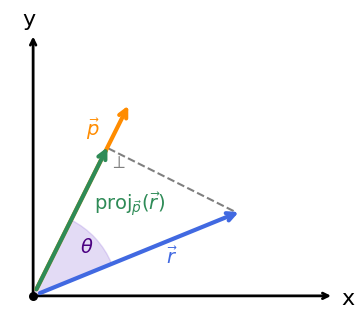

In [43]:

# --- Produit scalaire: angle et projection ---
from matplotlib import patches

r = np.array([2.7, 1.1])     # \\vec{r} (bleu)
p = np.array([1.25, 2.5])   # \\vec{p} (orange)

proj_r_on_p = np.dot(r, p) / np.dot(p, p) * p

fig, ax = plt.subplots(figsize=(4.2, 3.4))

# Axes with arrows
ax.annotate("", xy=(3.9, 0), xytext=(0, 0),
            arrowprops=dict(arrowstyle="->", lw=2, color="black"))
ax.annotate("", xy=(0, 3.4), xytext=(0, 0),
            arrowprops=dict(arrowstyle="->", lw=2, color="black"))
ax.text(4.0, -0.12, "x", fontsize=16)
ax.text(-0.14, 3.5, "y", fontsize=16)

# Origin dot
ax.scatter(0, 0, s=30, color="black", zorder=5)
eps = 0.06  # small offset to keep arrows from hiding the origin dot

# \\vec{r}
ax.annotate("", xy=r, xytext=eps * r / np.linalg.norm(r),
            arrowprops=dict(arrowstyle="->", color="royalblue", lw=3, mutation_scale=14))
ax.text(0.64*r[0], 0.6*r[1]-0.25, r"$\vec{r}$", color="royalblue", fontsize=14)

# \\vec{p}
ax.annotate("", xy=p, xytext=eps * p / np.linalg.norm(p),
            arrowprops=dict(arrowstyle="->", color="darkorange", lw=3, mutation_scale=14))
ax.text(0.45*p[0]+0.12, 0.55*p[1]+0.7, r"$\vec{p}$", color="darkorange", fontsize=14)

# Projection of \\vec{r} on \\vec{p}
ax.annotate("", xy=proj_r_on_p, xytext=eps * proj_r_on_p / np.linalg.norm(proj_r_on_p),
            arrowprops=dict(arrowstyle="->", color="seagreen", lw=3, mutation_scale=14))
ax.text(proj_r_on_p[0]*0.75+0.05, proj_r_on_p[1]*0.52+0.1,
        r"$\mathrm{proj}_{\vec p}(\vec r)$", color="seagreen", fontsize=14)

# Helper lines showing right angle and projection foot
ax.plot([r[0]-0.1, proj_r_on_p[0]], [r[1], proj_r_on_p[1]-0.05], ls="--", color="gray", lw=1.5)
ax.text(proj_r_on_p[0], proj_r_on_p[1]-0.3, r"$\perp$", color="gray", fontsize=13)

# Angle between the two vectors
theta_r = np.degrees(np.arctan2(r[1], r[0]))
theta_p = np.degrees(np.arctan2(p[1], p[0]))
theta_min, theta_max = min(theta_r, theta_p), max(theta_r, theta_p)
wedge = patches.Wedge((0, 0), 1.1, theta_min, theta_max,
                     facecolor="mediumpurple", edgecolor="mediumpurple", alpha=0.25)
ax.add_patch(wedge)
mid_angle = np.radians(0.5 * (theta_min + theta_max))
ax.text(0.95*np.cos(mid_angle)-0.09, 0.95*np.sin(mid_angle)-0.09, r"$\theta$",
        color="indigo", fontsize=14)

# Layout
ax.set_xlim(-0.3, 4.1)
ax.set_ylim(-0.3, 3.6)
ax.set_aspect("equal")
ax.axis("off")

plt.tight_layout()
plt.show()


## 2.2: Qubit et états superposés

Aujourd'hui, il ne fait plus de doute que la mécanique quantique est l'une des théories les plus précises pour décrire notre Univers. Par exemple, on a observé que les électrons d'un atome se comportent comme des ondes. Ils ne sont pas des petites billes qui tournent autour du noyau, mais en fait des des particules délocalisées, distribuées dans l'espace et la mesure de leur position est probabiliste. Un électron peut être vu comme un nuage, symbolisant qu'il est partout en même temps autour du noyau. Ainsi, la mesure de sa position peut prendre un grand nombre de valeurs (infinité). 

Il existe des systèmes physiques (comme des états de spins opposés ou voir plus tard) qui peuvent occuper seulement deux états (ou "positions") et peuvent servir d'équivalents quantiques des bits classiques, que l'on nomme des **qubits**. 


La mécanique quantique reposent sur des postulats, que nous introduirons tout au long du cours. Celui qui va nous intéresser présentement est celui de la représentation des états (quantiques) du système:

**Premier postulat**: *Les états quantiques forment un espace vectoriel (de Hilbert).*

Les états sont donc des vecteurs, dont les composantes renferment des probabilités (différemment de la manière vue dans le contexte classique). Les états qu'un système peut occuper sont appelés des *kets*. Supposons qu'un système puisse être observé dans deux états, représentés par les kets $\ket 0$ et $\ket 1$. Classiquement, un système peut être soit dans l'état $\ket 0$ soit dans l'état $\ket 1$. En mécanique quantique, le qubit peut occuper un de ces deux états ou une combinaison linéaire des deux, appelée **superposition d'états** (qui découle directement de la notion d'espace vectoriel). Une superposition d'états est aussi un état (de même qu'additionner deux vecteurs donne un vecteur). La façon de noter cette superposition, aussi appelée combinaison linéaire, est la suivante:

$ \qquad \alpha \ket 0 + \beta \ket 1 $, 

et les coefficients $\alpha$ et $\beta$ renferment la probabilité de mesurer $\ket 0$ ou $\ket 1$, respectivement: $P(\ket 0) = |\alpha|^2$ et $P(\ket 1) = |\beta|^2$ (à noter que ce sont en fait des nombres complexes, mais on verra sûrement ça plus tard), où $|\alpha|^2 + |\beta|^2 =1$.

Ici aussi, on représentera l'état de notre système $\alpha \ket 0 + \beta \ket 1$ par une version raccourcie, en un vecteur $\begin{pmatrix} \alpha \\ \beta \end{pmatrix}$. Anisi, le vecteur $\begin{pmatrix} 1 \\0 \end{pmatrix}$ correspond au ket $\ket 0$ et le vecteur $\begin{pmatrix} 0 \\1 \end{pmatrix}$ correspond au ket $\ket 1$.

  <img src="../figures/ket_base.png" width="400">

**Remarques**:

- Notons que lorsque l'on veut connaître dans quel état se trouve le système, la mesure nous indiquera parfois 0 et parfois 1, avec une certraine probabilitié (comme pour la position de l'électron).

- Il faut noter ici une différence majeure entre les vecteurs de probabilité classique et quantique. Classiquement, les valeurs de probabilité sont directement inscrites comme composantes du vecteur, tandis que dans le contexte de la mécanique quantique, les probabilités sont les valeurs absoules au carré des composantes du vecteur.